# **EDA : BANK LOAN DEFAULT RISK ANALYSIS**












# **IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/content/LoanDataset - LoansDatasest.csv')
df.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
1,2.0,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT


# ***PRE-PROCESSING DATA ***

In [ ]:
df.shape

(32586, 13)

In [ ]:
df.dtypes

,0
customer_id,float64
customer_age,int64
customer_income,object
home_ownership,object
employment_duration,float64
loan_intent,object
loan_grade,object
loan_amnt,object
loan_int_rate,float64
term_years,int64


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32586 entries, 0 to 32585
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          32583 non-null  float64
 1   customer_age         32586 non-null  int64  
 2   customer_income      32586 non-null  object 
 3   home_ownership       32586 non-null  object 
 4   employment_duration  31691 non-null  float64
 5   loan_intent          32586 non-null  object 
 6   loan_grade           32586 non-null  object 
 7   loan_amnt            32585 non-null  object 
 8   loan_int_rate        29470 non-null  float64
 9   term_years           32586 non-null  int64  
 10  historical_default   11849 non-null  object 
 11  cred_hist_length     32586 non-null  int64  
 12  Current_loan_status  32582 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 3.2+ MB


In [ ]:

df.describe()


,customer_id,customer_age,employment_duration,loan_int_rate,term_years,cred_hist_length
count,32583.000000,32586.000000,31691.000000,29470.000000,32586.000000,32586.000000
mean,16289.497806,27.732769,4.790161,11.011553,4.761738,5.804026
std,9405.919628,6.360528,4.142746,3.240440,2.471107,4.055078
min,1.000000,3.000000,0.000000,5.420000,1.000000,2.000000
25%,8144.500000,23.000000,2.000000,7.900000,3.000000,3.000000
50%,16288.000000,26.000000,4.000000,10.990000,4.000000,4.000000
75%,24433.500000,30.000000,7.000000,13.470000,7.000000,8.000000
max,32581.000000,144.000000,123.000000,23.220000,10.000000,30.000000


In [ ]:
print(df['Current_loan_status'].unique())
print(df['term_years'].unique())
print(df['loan_grade'].unique())
print(df['loan_intent'].unique())
print(df['home_ownership'].unique())
print(df['employment_duration'].unique())
print(df['historical_default'].unique())
print(df['cred_hist_length'].unique())

['DEFAULT' 'NO DEFAULT' nan]
[10  1  5  4  3  6  2  9  8  7]
['C' 'A' 'B' 'D' 'E']
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
['RENT' 'OWN' 'MORTGAGE' 'OTHER']
[123.   5.   1.   4.   8.   2.   6.   7.   0.   9.   3.  10.  nan  11.
  18.  12.  17.  14.  16.  13.  19.  15.  20.  22.  21.  24.  23.  26.
  25.  27.  28.  31.  41.  34.  29.  38.  30.]
['Y' nan 'N']
[ 3  2  4  8  7  6  9 10  5 11 16 15 12 13 17 14 25 28 27 22 19 29 23 26
 20 21 30 24 18]


In [ ]:



df.isnull().sum()

,0
customer_id,3
customer_age,0
customer_income,0
home_ownership,0
employment_duration,895
loan_intent,0
loan_grade,0
loan_amnt,1
loan_int_rate,3116
term_years,0


In [ ]:
df.shape

(32586, 13)

In [ ]:
for column in df.columns:
    if column != 'loan_amnt':
        if df[column].dtype in ['int64', 'float64']:
            df[column].fillna(df[column].mean(), inplace=True)
        else:
            df[column].fillna(df[column].mode()[0], inplace=True)


print(df.isnull().sum())


customer_id            0
customer_age           0
customer_income        0
home_ownership         0
employment_duration    0
loan_intent            0
loan_grade             0
loan_amnt              1
loan_int_rate          0
term_years             0
historical_default     0
cred_hist_length       0
Current_loan_status    0
dtype: int64


In [ ]:
df.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
1,2.0,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,Y,2,NO DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT


In [ ]:
df.describe()

,customer_id,customer_age,employment_duration,loan_int_rate,term_years,cred_hist_length
count,32586.000000,32586.000000,32586.000000,32586.000000,32586.000000,32586.000000
mean,16289.497806,27.732769,4.790161,11.011553,4.761738,5.804026
std,9405.486631,6.360528,4.085456,3.081611,2.471107,4.055078
min,1.000000,3.000000,0.000000,5.420000,1.000000,2.000000
25%,8145.250000,23.000000,2.000000,8.490000,3.000000,3.000000
50%,16289.248903,26.000000,4.000000,11.011553,4.000000,4.000000
75%,24432.750000,30.000000,7.000000,13.110000,7.000000,8.000000
max,32581.000000,144.000000,123.000000,23.220000,10.000000,30.000000


# **DISTRIBUTION** **CURVES**

<Axes: xlabel='Current_loan_status', ylabel='customer_age'>

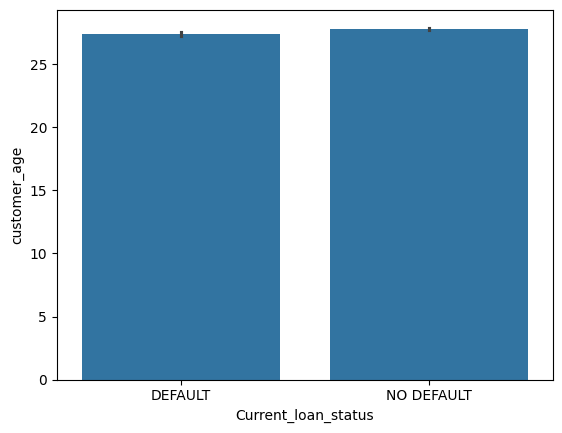

In [ ]:
sns.barplot(y='customer_age',x='Current_loan_status', data=df)


From above plot we can see there is no such correlation between customer age and loan status records.  

**CUSTOMER'S LOAN INTENT**

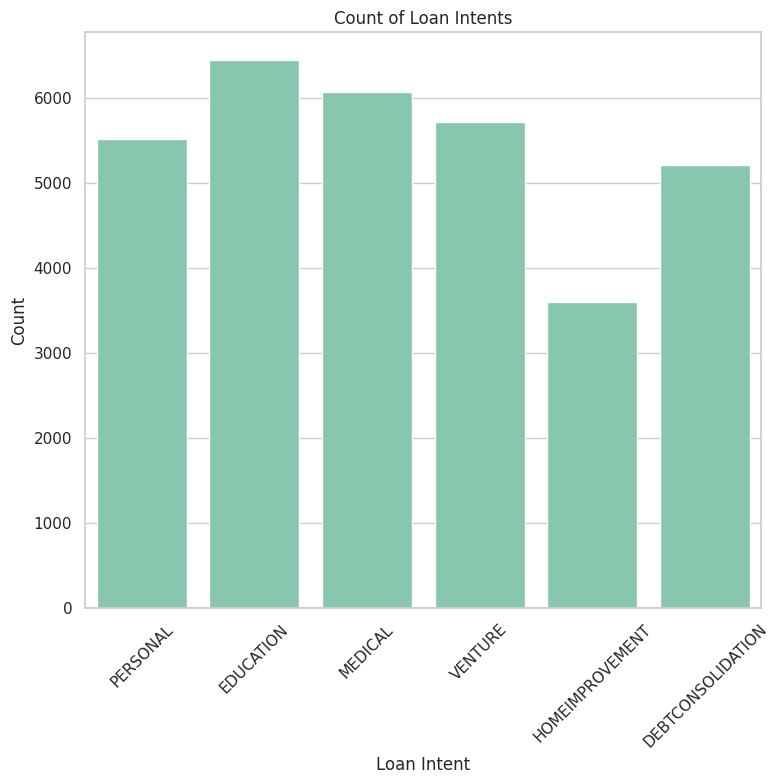

In [ ]:

plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
sns.countplot(x='loan_intent', data=df, color='#7dd1b0')
plt.title('Count of Loan Intents')
plt.xlabel('Loan Intent')
plt.ylabel('Count')
plt.xticks(ticks=range(len(df['loan_intent'].unique())), labels=df['loan_intent'].unique())
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()


 Customers primarily take loans for personal reasons - education and medical expenses


***CUSTOMER'S HOME OWNERSHIP ***

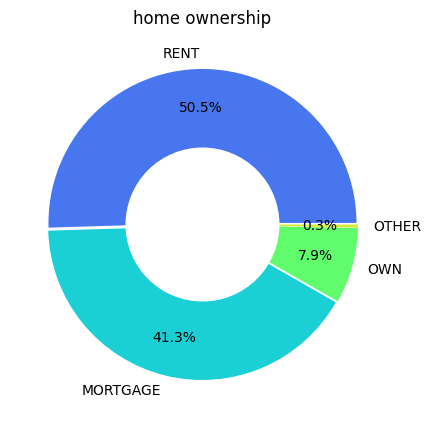

In [ ]:
explode=[0.01,0.01,0.01,0.01]
palette_color = sns.color_palette('turbo')
df['home_ownership'].value_counts().plot(kind='pie',figsize=(15,5),autopct='%1.1f%%',colors=palette_color,pctdistance=0.75,y='',explode=explode,ylabel='',title='home ownership')
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Customers who primarily take loans lives on rent about 50%.

***CUURENT LOAN STATUS ***

In [ ]:
df.Current_loan_status.value_counts()

Current_loan_status
NO DEFAULT    25746
DEFAULT        6840
Name: count, dtype: int64

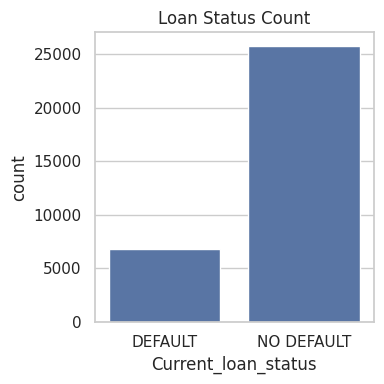

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))

sns.countplot(x='Current_loan_status', data=df )
plt.title('Loan Status Count')

plt.tight_layout()
plt.show()


From above plot we can see that around 21% i.e. 6840 people are defaulters in total 32586 records.

**INTEREST RATES VS LOAN GRADE**

In [ ]:
df['loan_grade'].value_counts()



loan_grade
A    15661
B     9065
C     4926
D     2629
E      305
Name: count, dtype: int64

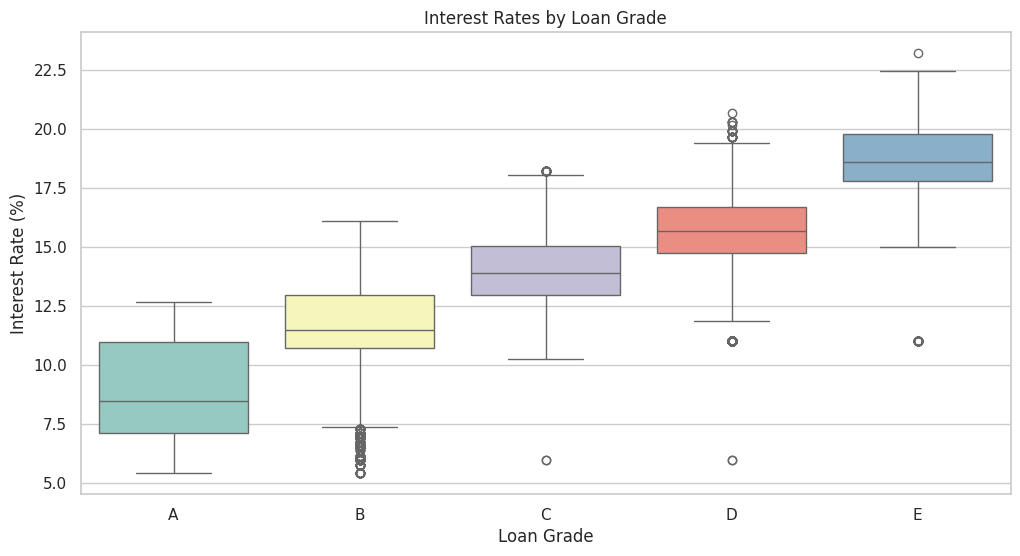

In [ ]:

df['loan_grade'] = df['loan_grade'].astype('category')
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_grade', y='loan_int_rate', data=df, palette='Set3',  hue = 'loan_grade' , legend = False )
plt.title('Interest Rates by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate (%)')
plt.show()


The plot helps to visualize how interest rates vary across different loan grades.

Higher grades i.e A generally represent lower risk as interest rate is less compared to lower grades i.e D and E represent higher risk.

***CUSTOMER EMPLOYMENT DURATION ***

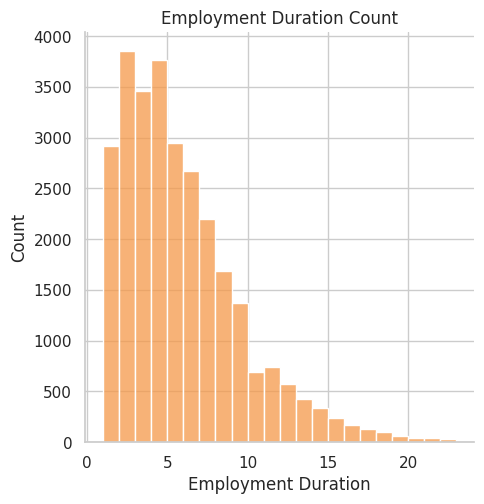

In [ ]:
bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20 , 21 ,22 , 23 ]
sns.displot(df['employment_duration'] , bins = bins , kde = False , color = '#f59949' )

plt.title('Employment Duration Count')
plt.xlabel('Employment Duration')
plt.ylabel('Count')

plt.show()

plt.show()

 The median employment duration for customers is around 4 years, indicating a relatively stable employment history among borrowers.

the most common employment durations is 2-3 years which is an important factor in assessing their creditworthiness and risk of default.

# **DEFALUT ANALYSIS BY HOME OWNERSHIP**

In [ ]:

default_counts = df.groupby(['home_ownership', 'Current_loan_status']).size().unstack()
default_counts

Current_loan_status,DEFAULT,NO DEFAULT
home_ownership,,
MORTGAGE,1556,11888
OTHER,33,74
OWN,157,2427
RENT,5094,11357


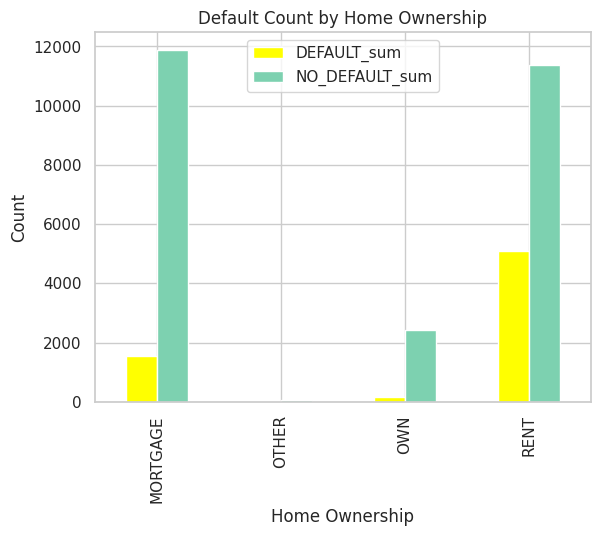

In [ ]:
default_counts.groupby('home_ownership').agg(DEFAULT_sum=('DEFAULT', 'sum'), NO_DEFAULT_sum=('NO DEFAULT', 'sum')).plot(kind='bar', color=['yellow', '#7dd1b0'])
plt.title('Default Count by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.show()

Out of 21% people who defaulted loans , around 74% of them lives on rent home ownership.

# **DEFALUT ANALYSIS BY LOAN INTENT**

In [ ]:
default_counts = df.groupby(['loan_intent', 'Current_loan_status']).size().unstack()
default_counts

Current_loan_status,DEFAULT,NO DEFAULT
loan_intent,,
DEBTCONSOLIDATION,1584,3629
EDUCATION,1026,5428
HOMEIMPROVEMENT,882,2724
MEDICAL,1523,4549
PERSONAL,1023,4500
VENTURE,802,4916


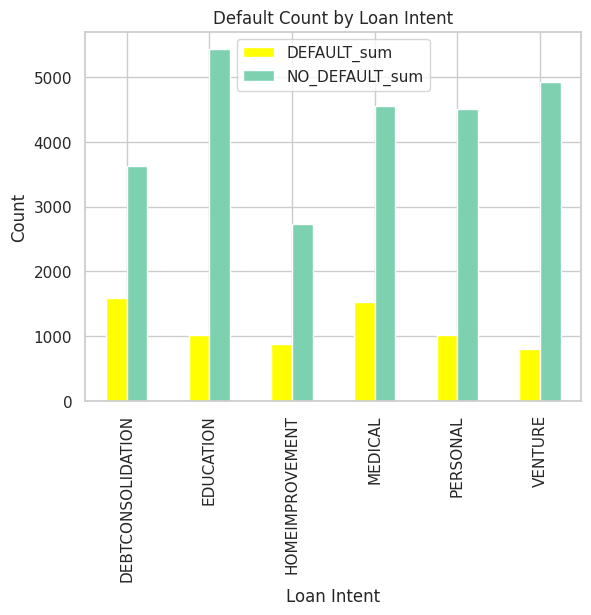

In [ ]:
default_counts.groupby('loan_intent').agg(DEFAULT_sum=('DEFAULT', 'sum'), NO_DEFAULT_sum=('NO DEFAULT', 'sum')).plot(kind='bar' , color=['yellow', '#7dd1b0'])
plt.title('Default Count by Loan Intent')
plt.xlabel('Loan Intent')
plt.ylabel('Count')
plt.show()

Out of all the defaluters majority of them took loan for debt consoildation and medical purposes i.e 45% of total defaulters .

# **DEFALUT ANALYSIS BY LOAN GRADE**

In [ ]:

default_counts = df.groupby(['loan_grade', 'Current_loan_status']).size().unstack()
default_counts

Current_loan_status,DEFAULT,NO DEFAULT
loan_grade,,
A,1567,14094
B,1751,7314
C,1761,3165
D,1540,1089
E,221,84


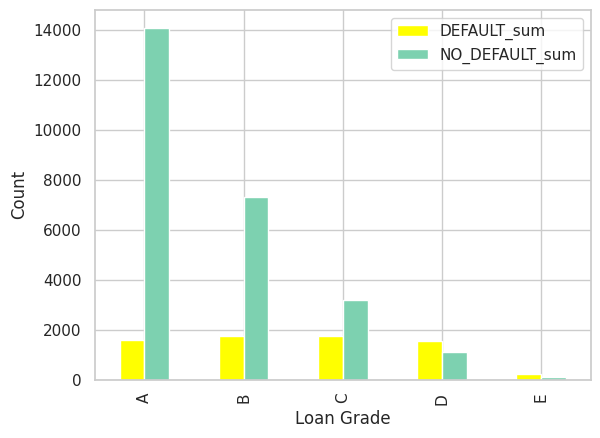

In [ ]:
default_counts = df.groupby(['loan_grade', 'Current_loan_status']).size().unstack()
default_counts
default_counts.groupby('loan_grade').agg(DEFAULT_sum=('DEFAULT', 'sum'), NO_DEFAULT_sum=('NO DEFAULT', 'sum')).plot(kind='bar' , color=['yellow', '#7dd1b0'])

plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.show()

Major concern lies where 48% i.e 3318 defaulters out of 6840 have been granted A and B grade by authorites .

In [ ]:

df['loan_amnt'] = pd.to_numeric(df['loan_amnt'], errors='coerce')
df['customer_income'] = pd.to_numeric(df['customer_income'], errors='coerce')


df[df['loan_amnt'] > df['customer_income']]

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status


In [ ]:
df[df.customer_income>3000000].count()
#df[df.customer_income>4000000].count()
#df[df.customer_income>5000000].count()
#df[df.customer_income>2000000].count()
#df[df.customer_income>1000000].count()


,0
customer_id,1
customer_age,1
customer_income,1
home_ownership,1
employment_duration,1
loan_intent,1
loan_grade,1
loan_amnt,0
loan_int_rate,1
term_years,1


**Customer Age vs Credit History Length**

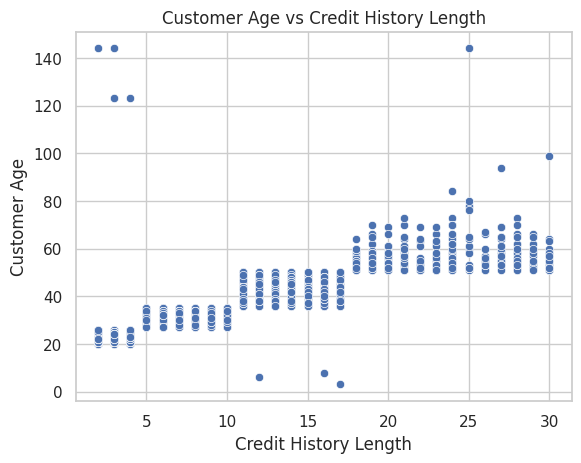

In [ ]:
sns.scatterplot(x='cred_hist_length', y='customer_age', data=df)
plt.title('Customer Age vs Credit History Length')
plt.xlabel('Credit History Length')
plt.ylabel('Customer Age')
plt.show()

The customers granted E loan grade belongs to 20 - 40 years gap , where a major attention should be given .

# ***COMMON INCOME RANGE ***

Number of customers in each income range:
Income Range
0-10k         74
10k-20k      970
20k-30k     2625
30k-40k     4953
40k-50k     4683
50k-60k     4376
60k-70k     3853
70k-80k     2951
80k-90k     1993
90k-100k    1535
Name: count, dtype: int64


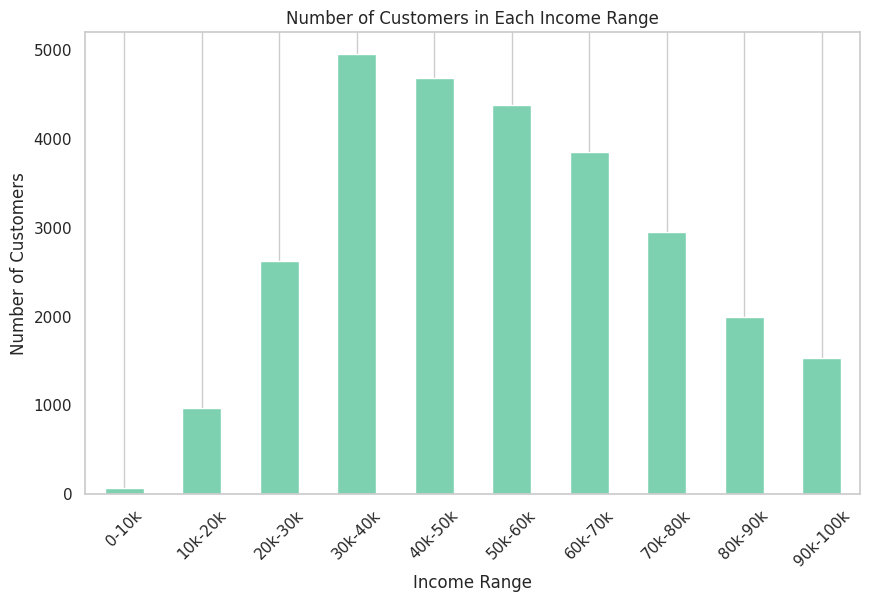

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
labels = ['0-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k', '60k-70k', '70k-80k', '80k-90k', '90k-100k']


df['Income Range'] = pd.cut(df['customer_income'], bins=bins, labels=labels, right=False)
income_range_counts = df['Income Range'].value_counts().sort_index()
print("Number of customers in each income range:")
print(income_range_counts)

plt.figure(figsize=(10, 6))
income_range_counts.plot(kind='bar' , color = '#7dd1b0')
plt.title('Number of Customers in Each Income Range')
plt.xlabel('Income Range')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Customer incomes vary widely, but most customers have incomes in the range 30k-40k i.e 4953 customers, whereas 40k-50k i.e 4683 and 50k-60k has 4376 customers suggesting that the loans are often taken by those with moderate financial means.

Hence , more than 50% of customers lies in the income range of 30k-70k .

we could see that most of the customers income fall within the range of above graph so only those income interval was included in the plot so that we could analyse it more better way.

<Axes: xlabel='Current_loan_status', ylabel='employment_duration'>

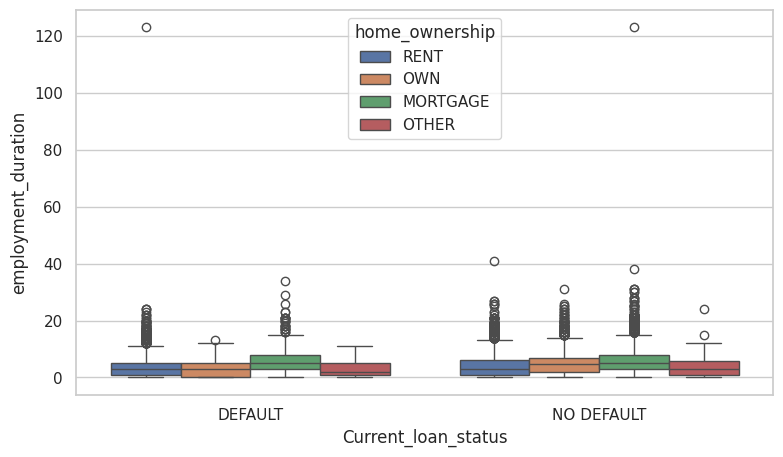

In [ ]:
fig, ax = plt.subplots( figsize = (9,5) )
sns.boxplot(x = "Current_loan_status", y = "employment_duration", hue='home_ownership', data = df)

This shows how home ownership affects employment duration within each loan status category like -

Mortgages which have longer employment durations contribute more in default loan cases compared other types of home ownership.


# **HEATMAP(CORRELATION MATRIX)**

In [ ]:
df.columns

Index(['customer_id', 'customer_age', 'customer_income', 'home_ownership',
       'employment_duration', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'term_years', 'historical_default', 'cred_hist_length',
       'Current_loan_status', 'Income Range', 'loan_amnt_rs'],
      dtype='object')

In [ ]:
td=pd.read_csv('/content/LoanDataset - LoansDatasest.csv')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_features = ['customer_age', 'customer_income', 'home_ownership',
       'employment_duration', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'term_years', 'historical_default', 'cred_hist_length',
       'Current_loan_status']
for feature in categorical_features:

    le.fit(td[feature])


    td[feature] = le.transform(td[feature])

td.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,5,2955,3,35,4,2,516,239,9,1,1,0
1,2.0,4,4211,2,5,1,0,1,92,0,2,0,1
2,3.0,8,4211,0,1,3,1,576,141,4,0,1,0
3,4.0,6,3263,3,4,3,1,516,217,9,0,0,0
4,5.0,7,2691,3,8,3,1,516,186,9,1,2,0


<Axes: >

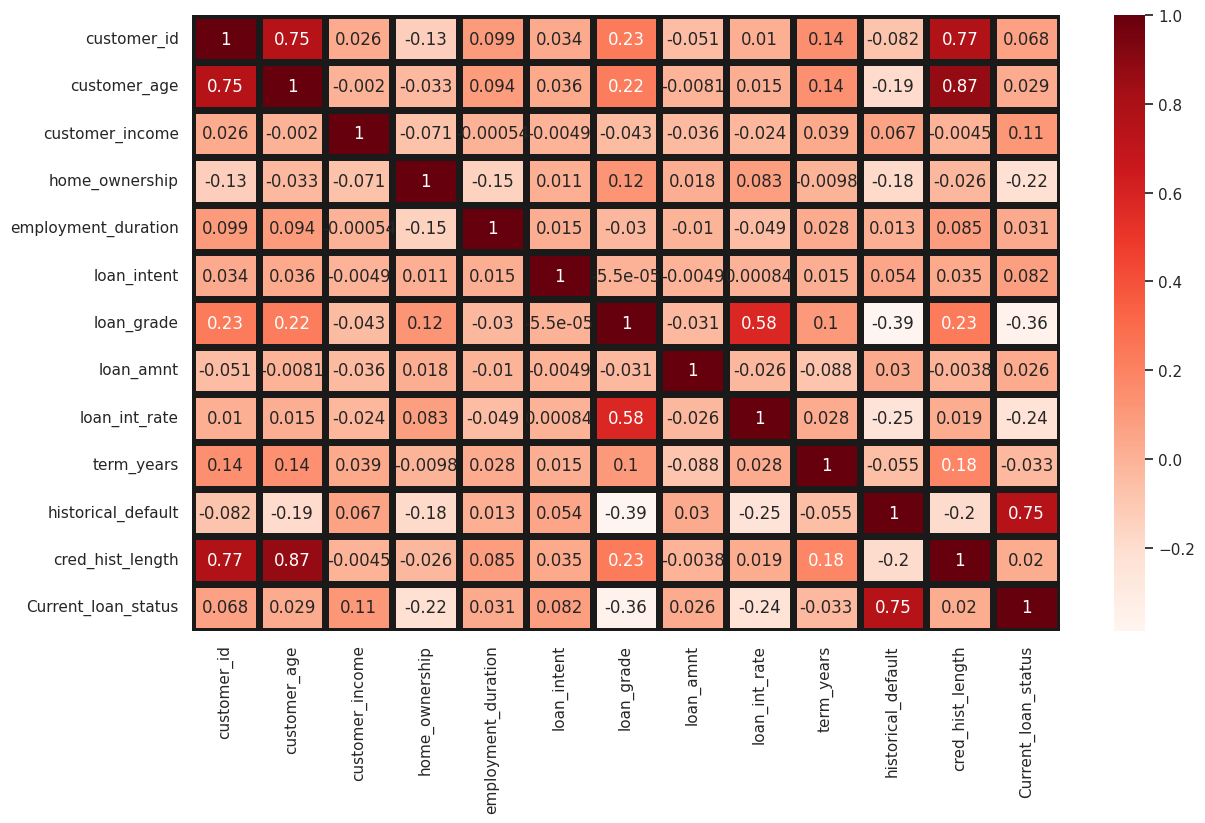

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(td.corr() , annot=True  , linecolor='k' , linewidths='5' , cmap='Reds')

1. There is a negative correlation between home ownership and Current loan status and employment duration  i.e -0.22 and -0.15 .
2. Loan grade and interest rates have also negative correlation with loan status .
3. There is a significant  positive coorelation between customer's age and credit history lenght i.e 0.87.

# ***INSIGHTS ***

>  Around 21% i.e. 6840 people are defaulters in total 32586 records.

> Customers who primarily take loans lives on rent and  out of 21% people who defaulted loans , around 74% of them lives on rent home ownership.

> Customers primarily take loans for personal reasons - education and medical expenses and out of all the defaluters majority of them took loan for debt consoildation and medical purposes i.e 45% of total defaulters .

> Higher grades i.e A generally represent lower risk as interest rate is less compared to lower grades i.e D and E represent higher risk.


>The customers granted E loan grade belongs to 20 - 40 years gap , where a major attention should be given .

>The most common employment durations is 2-3 years which is an important factor in assessing their creditworthiness and risk of default.

> There is no such correlation between customer age and loan status records.

> Major concern lies where 48% i.e 3318 defaulters out of 6840 have been granted A and B grade by authorites .

> Customer incomes vary widely, but most customers have incomes in the range 30k-40k i.e 4953 customers, whereas 40k-50k i.e 4683 and 50k-60k has 4376 customers suggesting that the loans are often taken by those with moderate financial means.
Hence , more than 50% of customers lies in the income range of 30k-70k .

> There is a negative correlation between home ownership and Current loan status and employment duration i.e -0.22 and -0.15 .

> There is a significant positive coorelation between customer's age and credit history lenght i.e 0.87.































